In [1]:
import aesara
import aesara.tensor as at
import numpy as np
import scipy

In [2]:
data1 = np.full((3, 5, 5), np.eye(5))
data2 = np.full((2, 10, 10), np.eye(10))
data3 = np.full((2, 30, 30), np.eye(30))
data4 = np.full((2, 50, 50), np.eye(50))
data5 = np.full((5, 10, 10), np.eye(10))
data6 = np.full((5, 30, 30), np.eye(30))
data7 = np.full((5, 50, 50), np.eye(50))
data8 = np.full((10, 10, 10), np.eye(10))
data9 = np.full((2, 100, 100), np.eye(100))
data10 = np.full((5, 100, 100), np.eye(100))

## Verify output

In [16]:
g = globals()

for i in range(1, 11):
    a = b = g['data{}'.format(i)]
    np_out = np.linalg.solve(a, b)
    at_np_out = at.nlinalg.solve(a, b).eval()    # Aesara Numpy
    at_sp_out = at.slinalg.solve(a, b).eval()    # Aesara Scipy
    
    print(np.allclose(np_out, at_np_out), np.allclose(np_out, at_sp_out))

True True
True True
True True
True True
True True
True True
True True
True True
True True
True True


### Calculating Size of data

In [64]:
from sys import getsizeof

g = globals()
data = []

for i in range(1, 11):
    data_name = 'data{}'.format(i)
    data_nd = g[data_name].ndim
    data_size = g[data_name].shape
    data_MB = round(getsizeof(g[data_name]) / 1024 / 1024, 4)
    data.append([data_name, data_nd, data_size, data_MB])

In [65]:
import pandas as pd
df = pd.DataFrame(data, columns=['Data', 'N-dims', 'Shape of Data', 'Memory Size(in MB)'])
df

,Data,N-dims,Shape of Data,Memory Size(in MB)
0,data1,3,"(3, 5, 5)",0.0007
1,data2,3,"(2, 10, 10)",0.0017
2,data3,3,"(2, 30, 30)",0.0139
3,data4,3,"(2, 50, 50)",0.0383
4,data5,3,"(5, 10, 10)",0.0040
5,data6,3,"(5, 30, 30)",0.0345
6,data7,3,"(5, 50, 50)",0.0955
7,data8,3,"(10, 10, 10)",0.0078
8,data9,3,"(2, 100, 100)",0.1527
9,data10,3,"(5, 100, 100)",0.3816


## Runtime for Aesara Scipy with Vectorization

In [7]:
# Aesara Scipy Function
a = at.tensor3()
b = at.tensor3()
f = aesara.function([a, b], at.slinalg.solve(a, b))

In [8]:
aesara_scipy_runtime = pd.DataFrame()

In [9]:
from IPython.display import clear_output

In [11]:
g = globals()

for i in range(1, 11):
    clear_output(wait=True)
    print("Testing Data - {}".format(i))
    run_time = []
    a = b = g['data{}'.format(i)]
    
    for iteration in range(15):
        time = %timeit -o f(a, b)
        run_time.append(time.average)
    
    aesara_scipy_runtime['data{}'.format(i)] = run_time

Testing Data - 10
10 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.93 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.4 ms ± 908 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.5 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.3 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.3 ms ± 362 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.2 ms ± 87.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.98 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 ms ± 89.5 µs per loop (mean ± std. dev. of 7 runs, 100 loop

In [12]:
aesara_scipy_runtime

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,0.001349,0.001223,0.001975,0.002560,0.001921,0.003306,0.004593,0.003088,0.004761,0.010015
1,0.001328,0.001332,0.001995,0.002536,0.001938,0.003319,0.004616,0.003371,0.004616,0.009933
2,0.001401,0.001699,0.001977,0.002533,0.001912,0.003307,0.004688,0.005640,0.004642,0.011396
3,0.001352,0.001802,0.001981,0.002527,0.001930,0.003316,0.004609,0.004213,0.004638,0.010099
4,0.001334,0.001272,0.001975,0.002530,0.001920,0.003305,0.004688,0.006407,0.005415,0.010527
5,0.001336,0.001405,0.001969,0.002538,0.001920,0.003318,0.004591,0.004672,0.005586,0.010265
6,0.001325,0.001224,0.001993,0.002534,0.001924,0.003309,0.004621,0.003248,0.004987,0.010082
7,0.001324,0.001215,0.001978,0.002524,0.002070,0.003732,0.004618,0.003567,0.004634,0.010258
8,0.001356,0.001236,0.001986,0.002523,0.001917,0.003392,0.004579,0.003113,0.005210,0.010059
9,0.001328,0.001229,0.002012,0.002547,0.001914,0.003331,0.004605,0.003029,0.004940,0.010041


In [13]:
aesara_scipy_runtime.mean(axis=0)

data1     0.001369
data2     0.001319
data3     0.001986
data4     0.002551
data5     0.001935
data6     0.003350
data7     0.004642
data8     0.003751
data9     0.004838
data10    0.010224
dtype: float64

In [66]:
df["Aesara_Scipy_AvgTime"] = aesara_scipy_runtime.mean(axis=0).values
df

,Data,N-dims,Shape of Data,Memory Size(in MB),Aesara_Scipy_AvgTime
0,data1,3,"(3, 5, 5)",0.0007,0.001369
1,data2,3,"(2, 10, 10)",0.0017,0.001319
2,data3,3,"(2, 30, 30)",0.0139,0.001986
3,data4,3,"(2, 50, 50)",0.0383,0.002551
4,data5,3,"(5, 10, 10)",0.0040,0.001935
5,data6,3,"(5, 30, 30)",0.0345,0.003350
6,data7,3,"(5, 50, 50)",0.0955,0.004642
7,data8,3,"(10, 10, 10)",0.0078,0.003751
8,data9,3,"(2, 100, 100)",0.1527,0.004838
9,data10,3,"(5, 100, 100)",0.3816,0.010224


## Runtime for Aesara Numpy Implementation

In [20]:
# Aesara Numpy Function
a = at.tensor3()
b = at.tensor3()
f_np = aesara.function([a, b], at.nlinalg.solve(a, b))

In [21]:
aesara_numpy_runtime = pd.DataFrame()

In [22]:
g = globals()

for i in range(1, 11):
    clear_output(wait=True)
    print("Testing Data - {}".format(i))
    run_time = []
    a = b = g['data{}'.format(i)]
    
    for iteration in range(15):
        time = %timeit -o f_np(a, b)
        run_time.append(time.average)
    
    aesara_numpy_runtime['data{}'.format(i)] = run_time

Testing Data - 10
6.01 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.74 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.75 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.76 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.62 ms ± 61.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.62 ms ± 62.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.72 ms ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.63 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.8 ms ± 531 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.51 ms ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.21 ms ± 698 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.48 ms ± 42.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.02 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.17 ms ± 780 µs per loop (mean ± std. dev. of 7 runs, 

In [23]:
aesara_numpy_runtime

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,0.000137,0.000160,0.000576,0.000823,0.000227,0.000922,0.003057,0.000287,0.003363,0.006014
1,0.000132,0.000163,0.000599,0.000719,0.000216,0.001031,0.002273,0.000273,0.002713,0.005736
2,0.000132,0.000179,0.000560,0.000730,0.000222,0.000804,0.002748,0.000314,0.002504,0.005745
3,0.000132,0.000186,0.000629,0.000720,0.000207,0.000790,0.002962,0.000282,0.003245,0.005758
4,0.000132,0.000178,0.000516,0.000716,0.000203,0.000847,0.002563,0.000273,0.002952,0.005619
5,0.000133,0.000173,0.000542,0.000724,0.000206,0.000851,0.001931,0.000274,0.002536,0.005621
6,0.000137,0.000167,0.000560,0.000724,0.000246,0.000859,0.002167,0.000296,0.002578,0.005717
7,0.000132,0.000173,0.000514,0.000864,0.000236,0.000855,0.001898,0.000279,0.002434,0.005633
8,0.000132,0.000175,0.000534,0.000905,0.000216,0.000894,0.001911,0.000278,0.003140,0.005799
9,0.000132,0.000162,0.000510,0.001103,0.000239,0.001111,0.001853,0.000275,0.002991,0.005514


In [67]:
df["Aesara_Numpy_AvgTime"] = aesara_numpy_runtime.mean(axis=0).values
df

,Data,N-dims,Shape of Data,Memory Size(in MB),Aesara_Scipy_AvgTime,Aesara_Numpy_AvgTime
0,data1,3,"(3, 5, 5)",0.0007,0.001369,0.000133
1,data2,3,"(2, 10, 10)",0.0017,0.001319,0.000187
2,data3,3,"(2, 30, 30)",0.0139,0.001986,0.000541
3,data4,3,"(2, 50, 50)",0.0383,0.002551,0.000812
4,data5,3,"(5, 10, 10)",0.0040,0.001935,0.000221
5,data6,3,"(5, 30, 30)",0.0345,0.003350,0.001133
6,data7,3,"(5, 50, 50)",0.0955,0.004642,0.002150
7,data8,3,"(10, 10, 10)",0.0078,0.003751,0.000283
8,data9,3,"(2, 100, 100)",0.1527,0.004838,0.002740
9,data10,3,"(5, 100, 100)",0.3816,0.010224,0.005795


## Visualizing Runtime

In [25]:
import matplotlib.pyplot as plt

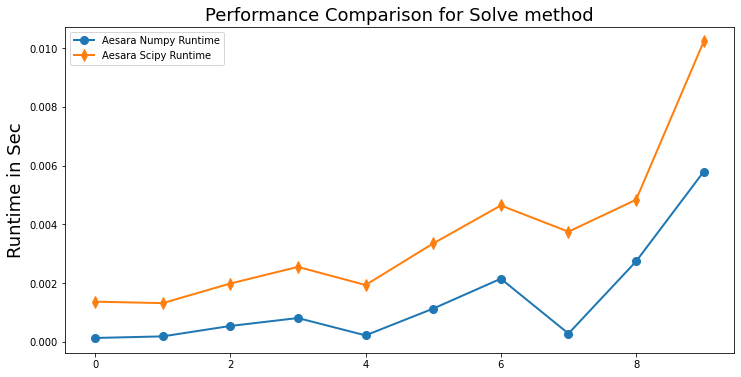

In [53]:
plt.figure(figsize=(12,6))

plt.plot(df["Aesara_Numpy_AvgTime"], lw = 2, marker = 'o', ms = 8, label = "Aesara Numpy Runtime")
plt.plot(df["Aesara_Scipy_AvgTime"], lw = 2, marker = 'd', ms = 8, label = "Aesara Scipy Runtime")

plt.title("Performance Comparison for Solve method", fontsize=18)
plt.ylabel("Runtime in Sec", fontsize=18)
plt.legend()

## Aesara Numpy vs Scipy

In [68]:
df["Aesara_Scipy_AvgTime"]/df["Aesara_Numpy_AvgTime"]

0    10.304542
1     7.051309
2     3.667227
3     3.143580
4     8.774489
5     2.957497
6     2.159498
7    13.275843
8     1.765471
9     1.764352
dtype: float64

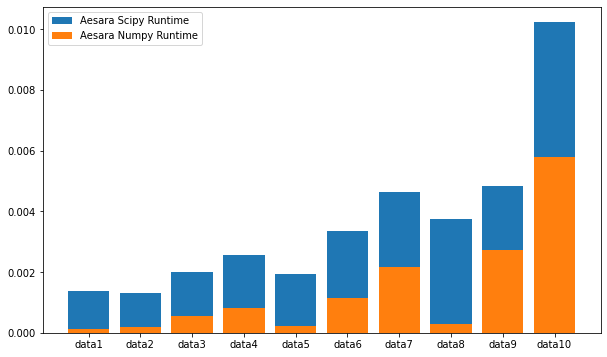

In [124]:
plt.figure(figsize=(10,6))
plt.bar(x=df["Data"], height=df["Aesara_Scipy_AvgTime"], label = "Aesara Scipy Runtime")
plt.bar(x=df["Data"], height=df["Aesara_Numpy_AvgTime"], label = "Aesara Numpy Runtime")
plt.legend()

In [125]:
df2 = df[["Aesara_Scipy_AvgTime", "Aesara_Numpy_AvgTime"]]

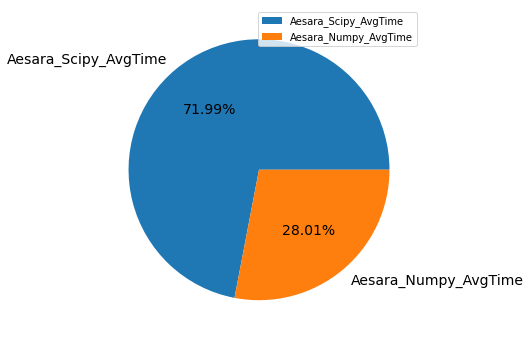

In [126]:
plt.figure(figsize=(10,6))
plt.pie(df2.sum(), labels = df2.columns, autopct='%.2f%%', textprops={'fontsize': 14})
plt.legend()

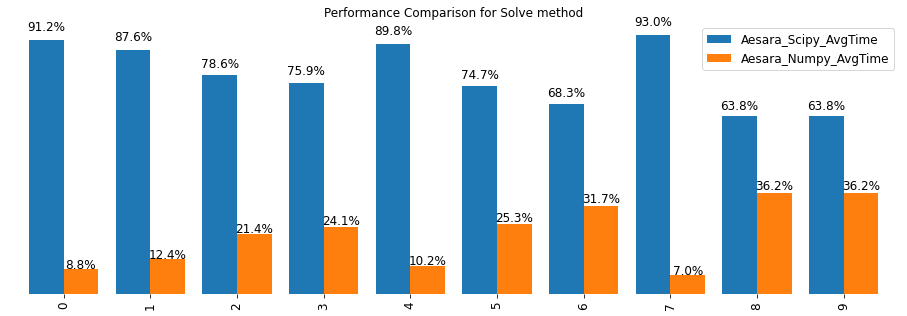

In [132]:
# Normalize result
result_pct = df2.div(df2.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(16,5), width = 0.8)
plt.legend(labels=df2.columns,fontsize= 12)
plt.title("Performance Comparison for Solve method",fontsize= 12)

plt.xticks(fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1%}', (x + width/2, y + height*1.04), ha='center', fontsize=12)

## Runtime for Scipy

In [31]:
scipy_vsolve = np.vectorize(
            scipy.linalg.solve,
            excluded={"sym_pos", "lower", "overwrite_a", "overwrite_b", "check_finite", "assume_a", "transposed"},
            signature="(m,m),(m,k)->(m,k)",
        )

In [32]:
scipy_runtime = pd.DataFrame()

In [33]:
g = globals()

for i in range(1, 11):
    clear_output(wait=True)
    print("Testing Data - {}".format(i))
    run_time = []
    a = b = g['data{}'.format(i)]
    
    for iteration in range(15):
        time = %timeit -o scipy_vsolve(a, b)
        run_time.append(time.average)
    
    scipy_runtime['data{}'.format(i)] = run_time

Testing Data - 10
9.58 ms ± 83.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.75 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.61 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.53 ms ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.54 ms ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.51 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.51 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.51 ms ± 24.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.79 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.67 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.56 ms ± 66.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.56 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.72 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.5 ms ± 35.4 µs per loop (mean ± std. dev. of 7 run

In [133]:
df["Scipy_AvgTime"] = scipy_runtime.mean(axis=0).values
df

,Data,N-dims,Shape of Data,Memory Size(in MB),Aesara_Scipy_AvgTime,Aesara_Numpy_AvgTime,Scipy_AvgTime
0,data1,3,"(3, 5, 5)",0.0007,0.001369,0.000133,0.001089
1,data2,3,"(2, 10, 10)",0.0017,0.001319,0.000187,0.000910
2,data3,3,"(2, 30, 30)",0.0139,0.001986,0.000541,0.001533
3,data4,3,"(2, 50, 50)",0.0383,0.002551,0.000812,0.002093
4,data5,3,"(5, 10, 10)",0.0040,0.001935,0.000221,0.001607
5,data6,3,"(5, 30, 30)",0.0345,0.003350,0.001133,0.003039
6,data7,3,"(5, 50, 50)",0.0955,0.004642,0.002150,0.004213
7,data8,3,"(10, 10, 10)",0.0078,0.003751,0.000283,0.002755
8,data9,3,"(2, 100, 100)",0.1527,0.004838,0.002740,0.004240
9,data10,3,"(5, 100, 100)",0.3816,0.010224,0.005795,0.009595


## Runtime for Numpy

In [36]:
numpy_runtime = pd.DataFrame()

In [37]:
g = globals()

for i in range(1, 11):
    clear_output(wait=True)
    print("Testing Data - {}".format(i))
    run_time = []
    a = b = g['data{}'.format(i)]
    
    for iteration in range(15):
        time = %timeit -o scipy_vsolve(a, b)
        run_time.append(time.average)
    
    numpy_runtime['data{}'.format(i)] = run_time

Testing Data - 10
9.54 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.62 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.47 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.51 ms ± 76 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.45 ms ± 42.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.65 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.46 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.46 ms ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.45 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 ms ± 762 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.9 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.53 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.45 ms ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.45 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs,

In [42]:
df["Numpy_AvgTime"] = numpy_runtime.mean(axis=0).values
df

,N-dims,Shape of Data,Memory Size(in MB),Aesara_Scipy_AvgTime,Aesara_Numpy_AvgTime,Scipy_AvgTime,Numpy_AvgTime
0,3,"(3, 5, 5)",0.0007,0.001369,0.000133,0.001089,0.001124
1,3,"(2, 10, 10)",0.0017,0.001319,0.000187,0.000910,0.001009
2,3,"(2, 30, 30)",0.0139,0.001986,0.000541,0.001533,0.001599
3,3,"(2, 50, 50)",0.0383,0.002551,0.000812,0.002093,0.002092
4,3,"(5, 10, 10)",0.0040,0.001935,0.000221,0.001607,0.001607
5,3,"(5, 30, 30)",0.0345,0.003350,0.001133,0.003039,0.002849
6,3,"(5, 50, 50)",0.0955,0.004642,0.002150,0.004213,0.004168
7,3,"(10, 10, 10)",0.0078,0.003751,0.000283,0.002755,0.002747
8,3,"(2, 100, 100)",0.1527,0.004838,0.002740,0.004240,0.004200
9,3,"(5, 100, 100)",0.3816,0.010224,0.005795,0.009595,0.009563


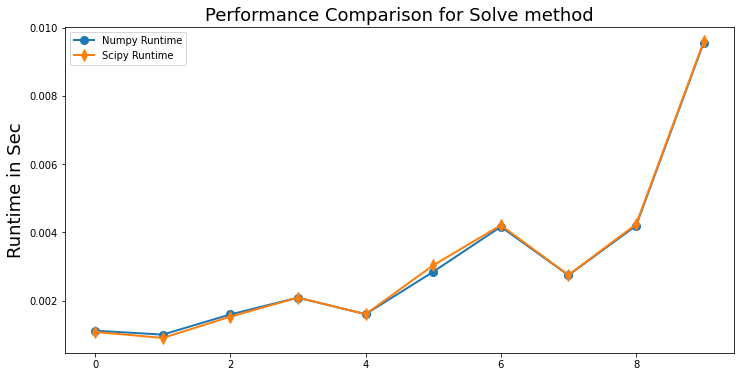

In [52]:
plt.figure(figsize=(12,6))

plt.plot(df["Numpy_AvgTime"], lw = 2, marker = 'o', ms = 8, label = "Numpy Runtime")
plt.plot(df["Scipy_AvgTime"], lw = 2, marker = 'd', ms = 8, label = "Scipy Runtime")

plt.title("Performance Comparison for Solve method", fontsize=18)
plt.ylabel("Runtime in Sec", fontsize=18)
plt.legend()

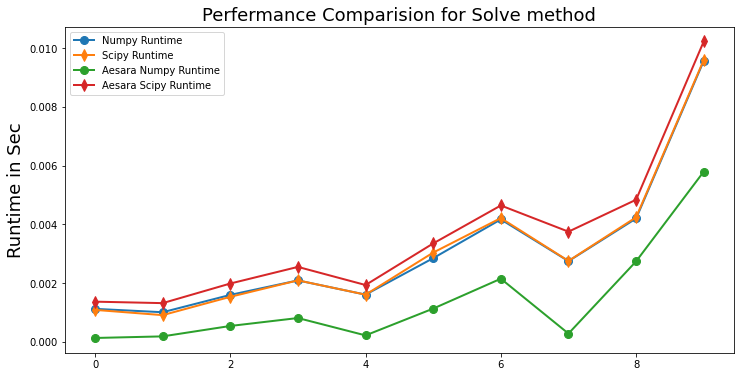

In [51]:
plt.figure(figsize=(12,6))

plt.plot(df["Numpy_AvgTime"], lw = 2, marker = 'o', ms = 8, label = "Numpy Runtime")
plt.plot(df["Scipy_AvgTime"], lw = 2, marker = 'd', ms = 8, label = "Scipy Runtime")

plt.plot(df["Aesara_Numpy_AvgTime"], lw = 2, marker = 'o', ms = 8, label = "Aesara Numpy Runtime")
plt.plot(df["Aesara_Scipy_AvgTime"], lw = 2, marker = 'd', ms = 8, label = "Aesara Scipy Runtime")

plt.title("Performance Comparison for Solve method", fontsize=18)
plt.ylabel("Runtime in Sec", fontsize=18)
plt.legend()